# Process The Terms from the Covid19 Tweet

In [1]:
%load_ext lab_black
%matplotlib inline

In [2]:
import pandas as pd
from glob import glob
from tqdm import tqdm
import matplotlib.pylab as plt

In [51]:
# !ls -l covid19_twitter/dailies/2021-06-27/

# Terms

In [5]:
topterms = glob("covid19_twitter/dailies/*/*_top1000terms.csv")

In [17]:
terms_all = []
for term in tqdm(topterms):
    tfreq = pd.read_csv(term, header=None).rename(columns={0: "term", 1: "frequency"})
    tfreq["date"] = term.split("/")[2]
    terms_all.append(tfreq)
terms_all = pd.concat(terms_all).reset_index(drop=True)
terms_all["date"] = pd.to_datetime(terms_all["date"])

100%|██████████| 623/623 [00:01<00:00, 412.52it/s]


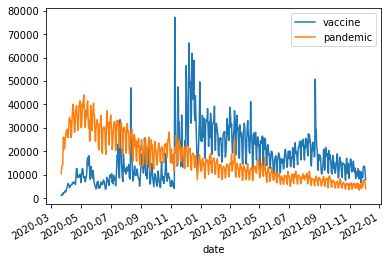

In [49]:
# Example Plot
terms_all.query('term == "vaccine"').set_index("date")["frequency"].plot()
terms_all.query('term == "pandemic"').set_index("date")["frequency"].plot()
plt.legend(["vaccine", "pandemic"])

In [46]:
# Save!
terms_all.to_csv("covid_tweet_terms.csv", index=False)
terms_all.to_parquet("covid_tweet_terms.parquet")

# Bigrams
For some reason trigrams and bigram files are swapped!

In [137]:
topbg = glob("covid19_twitter/dailies/*/*_top1000bigrams.csv")
terms_bg = []
for term in tqdm(topbg):
    tfreq = pd.read_csv(term)
    tfreq["date"] = term.split("/")[2]
    tfreq["counts"] = pd.to_numeric(tfreq["counts"])
    terms_bg.append(tfreq)
terms_bg = pd.concat(terms_bg).reset_index(drop=True)
terms_bg["date"] = pd.to_datetime(terms_bg["date"])

100%|██████████| 623/623 [00:01<00:00, 415.60it/s]


In [150]:
# Save! as trigrams because its named wrong in the raw data
terms_bg.to_csv("covid_tweet_terms_trigrams.csv", index=False)
terms_bg.to_parquet("covid_tweet_terms_trigrams.parquet")

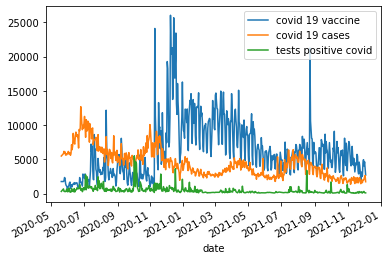

In [127]:
# Example Plot
terms_bg.query('gram == "covid 19 vaccine"').set_index("date")["counts"].plot()
terms_bg.query('gram == "covid 19 cases"').set_index("date")["counts"].plot()
terms_bg.query('gram == "tests positive covid"').set_index("date")["counts"].plot()

plt.legend(["covid 19 vaccine", "covid 19 cases", "tests positive covid"])

# Trigrams

In [151]:
toptg = glob("covid19_twitter/dailies/*/*_top1000trigrams.csv")
terms_tg = []
for term in tqdm(toptg):
    tfreq = pd.read_csv(term)
    tfreq["date"] = term.split("/")[2]
    tfreq["counts"] = pd.to_numeric(tfreq["counts"])
    terms_tg.append(tfreq)
terms_tg = pd.concat(terms_tg).reset_index(drop=True)
terms_tg["date"] = pd.to_datetime(terms_tg["date"])

100%|██████████| 622/622 [00:01<00:00, 515.23it/s]


In [152]:
# Save! as bigrams because its named wrong in the raw data
terms_tg.to_csv("covid_tweet_terms_bigrams.csv", index=False)
terms_tg.to_parquet("covid_tweet_terms_bigrams.parquet")

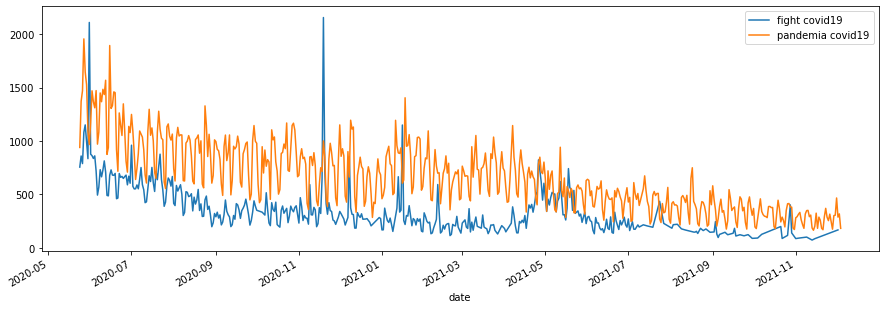

In [201]:
example_terms = (
    terms_tg.groupby("gram")["counts"]
    .sum()
    .reset_index()
    .query("counts > 100_000")
    .sample(2)["gram"]
    .values
)
# example_terms = terms_tg.query("counts > 1_000").sample(2)["gram"].unique()
terms_tg.query("gram in @example_terms").set_index("date").groupby("gram")[
    "counts"
].plot(figsize=(15, 5))
plt.legend()

In [215]:
# terms_tg.loc[terms_tg["gram"].str.contains(" hanks")]
# terms_tg.loc[terms_tg["gram"].str.contains("clooney")]

In [216]:
# terms_tg.groupby("gram")["counts"].sum().sort_values(ascending=False)